In [ ]:
 !sudo apt-get install -y fonts-nanum
 !sudo fc-cache -fv
 !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,711 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and dire

In [ ]:
pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 36.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.3 which is incompatible.


In [ ]:
pip install seaborn==0.11.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


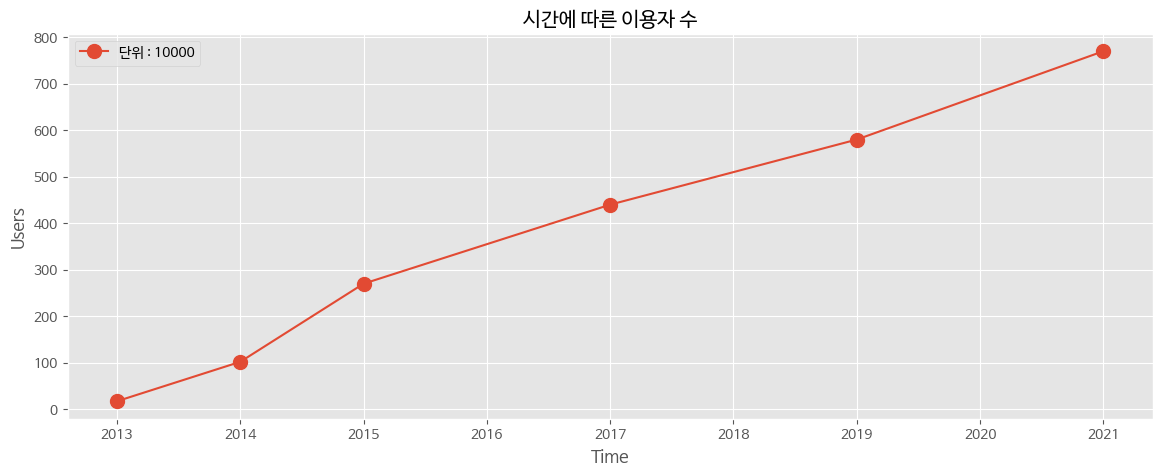

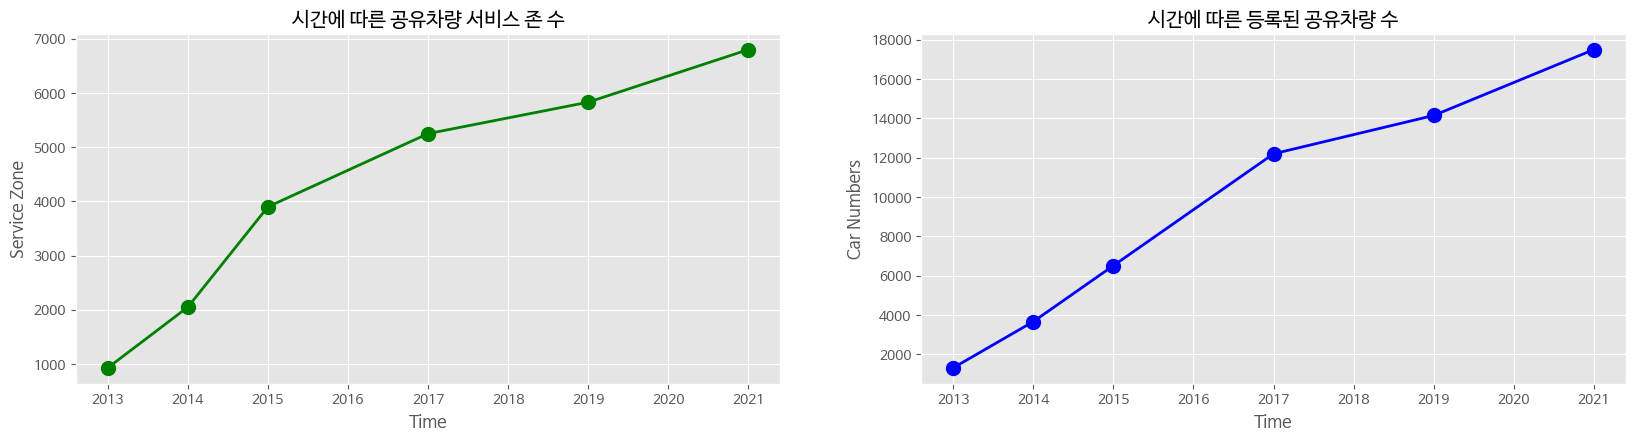

In [ ]:
# Car_Sharing 수요에 대한 데이터 가공
# 이미지 까지 가져오면 좋지 않을까 ?
import pandas as pd
import matplotlib.pyplot as plt
# import google.colab.patches import files
plt.rc('font', family = 'NanumBarunGothic')

# # 한글 사용을 위한 폰트 설치
# !sudo apt-get install -y fonst-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

df = pd.read_excel("/카셰어링_수요.xlsx")

# 엑셀 파일을 다루기 위한 설정
df = df.rename(columns = {'Unnamed: 0': '분류'})
df = df.set_index('분류')

# 이용자 수에 대한 시각화 자료 -> 선 그래프
# 선 그래프로 시간에 따른 이용자 수의 변화를 보여줌 -> 이용자 수 증가 -> 시장의 증가
using_car_sr = df.loc['이용자수'] / 10000

plt.style.use('ggplot')

plt.figure(figsize = (14,5))

plt.plot(using_car_sr.index, using_car_sr.values, marker = 'o', markersize = 10)

plt.title('시간에 따른 이용자 수')
plt.xlabel('Time')
plt.ylabel('Users')

plt.legend(labels = ['단위 : 10000'], loc = 'best')
plt.show()

# 이용자 수에 따른 서비스 존과 차량 수의 증가

# 그래프 객체 생성
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

#서비스 존에 대한 선 그래프 생성
service_zone_sr = df.loc['서비스존']

ax1.plot(service_zone_sr.index, service_zone_sr.values, marker = 'o', markersize = 10,
         color = 'green', linewidth = 2)

ax1.set_title('시간에 따른 공유차량 서비스 존 수')
ax1.set_xlabel('Time')
ax1.set_ylabel('Service Zone')

#차량 수에 대한 선 그래프 생성
car_numbers_sr = df.loc['차량수']

ax2.plot(car_numbers_sr.index, car_numbers_sr.values, marker = 'o', markersize = 10,
         color = 'blue', linewidth = 2)

ax2.set_title('시간에 따른 등록된 공유차량 수')
ax2.set_xlabel('Time')
ax2.set_ylabel('Car Numbers')


plt.show()


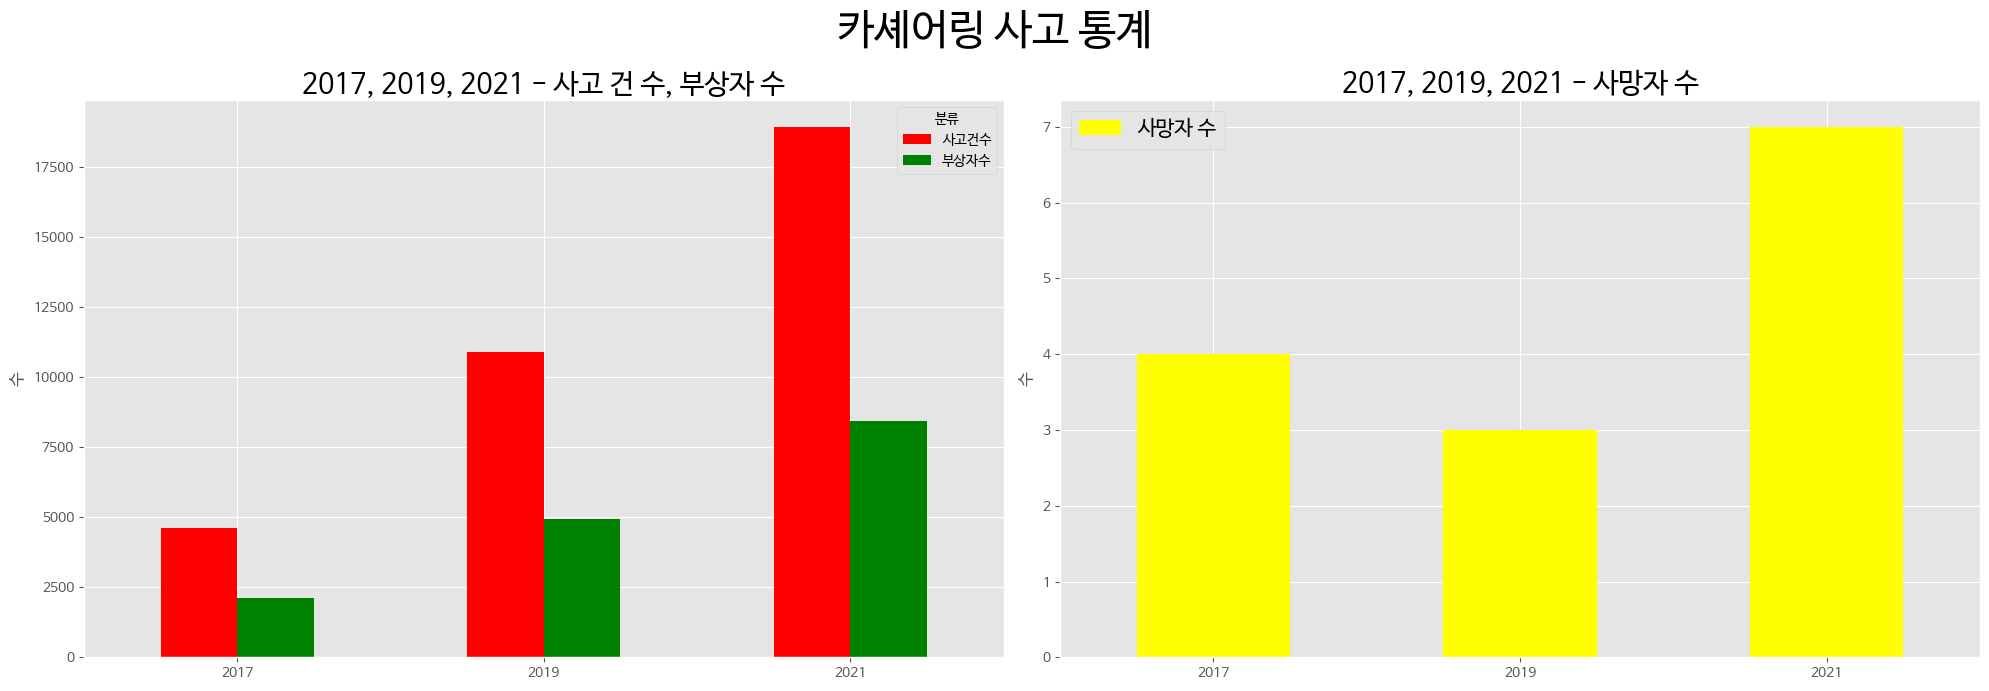

In [ ]:
# Step2) 문제 제시 (카셰어링 사고 통계, 운전자 연령별 구성비, 사고 운전자 연령)
# 카셰어링 사고 통계 -> 막대 그래프로 (사고건수, 부상자수, 사망자수) 를 보여줌

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family = 'NanumBarunGothic')

df = pd.read_excel("/카셰어링_사고통계.xlsx")

#데이터 가공 전 데이터 세팅
df.rename(columns = {'Unnamed: 0' : '분류'}, inplace = True)
df.set_index('분류', inplace = True)

df_acci_inju = df.loc[['사고건수', '부상자수']]
df_dead = df.loc['사망자수']

#막대 그래프 bar() 으로 사고건수, 사망자수, 부상자수 를 한번에 보여줌

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# 첫 번째 서브플롯 (사고 건 수, 부상자 수)
df_acci_inju.T.plot(kind='bar', color=['red', 'green'], ax=axes[0])
axes[0].set_title('2017, 2019, 2021 - 사고 건 수, 부상자 수', size=20)
axes[0].set_ylabel('수')

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 0)

# 두 번째 서브플롯 (사망자 수)
df_dead.plot(kind='bar', color='yellow', ax=axes[1])
axes[1].set_title('2017, 2019, 2021 - 사망자 수', size=20)
axes[1].set_ylabel('수')
axes[1].legend(labels = ['사망자 수'], loc = 'best', fontsize = 15)

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 0)

# 전체 그래프에 대한 타이틀 추가
plt.suptitle('카셰어링 사고 통계', size=30)

# 서브플롯 간 간격 조정
plt.tight_layout()

plt.show()

In [ ]:
# 연령별 구성비에 따른 데이터 시각화 -> 막대 그래프 이용
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_excel('/카셰어링_연령별구성비.xlsx')

# 데이터 가공 전 데이터 세팅
df.rename(columns={'Unnamed: 0': '분류'}, inplace=True)
df.set_index('분류', inplace=True)

# 연령대별 데이터 선택
df_degree_age = df.loc[['20대', '30대', '40대', '50대']] /1000
df_20_age = df.loc[['20대초반', '20대후반']] /1000

# 막대 그래프 그리기
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# 20대, 30대, 40대, 50대의 막대 그래프
df_degree_age.T.plot(kind='bar', ax=axes[0], cmap='viridis')
axes[0].set_title('20대, 30대, 40대, 50대 연령별 구성비', size=16)
axes[0].set_xlabel('연도', size=14)
axes[0].set_ylabel('인원수', size=14)
axes[0].legend(title='연령대', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 0)

for ax in axes:
    legend_text = ax.legend(title='단위 : 천(1000)', bbox_to_anchor=(1.05, 1), loc='upper left').get_texts()
    plt.setp(legend_text)

# 20대초반, 20대후반의 히스토그램
df_20_age.T.plot(kind='bar', ax=axes[1], cmap='viridis')
axes[1].set_title('20대 초반과 20대 후반의 연령별 구성비', size=16)
axes[1].set_xlabel('연도', size=14)
axes[1].set_ylabel('인원수', size=14)
axes[1].legend(title='연령대', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 0)

for ax in axes:
    legend_text = ax.legend(title='단위 : 천(1000)', bbox_to_anchor=(1.05, 1), loc='upper left').get_texts()
    plt.setp(legend_text)

# 전체 그래프에 대한 타이틀 추가
plt.suptitle('카셰어링 이용자들의 연령별 구성비', size=20)

# 서브플롯 간 간격 조정
plt.tight_layout()

plt.show()

FileNotFoundError: ignored

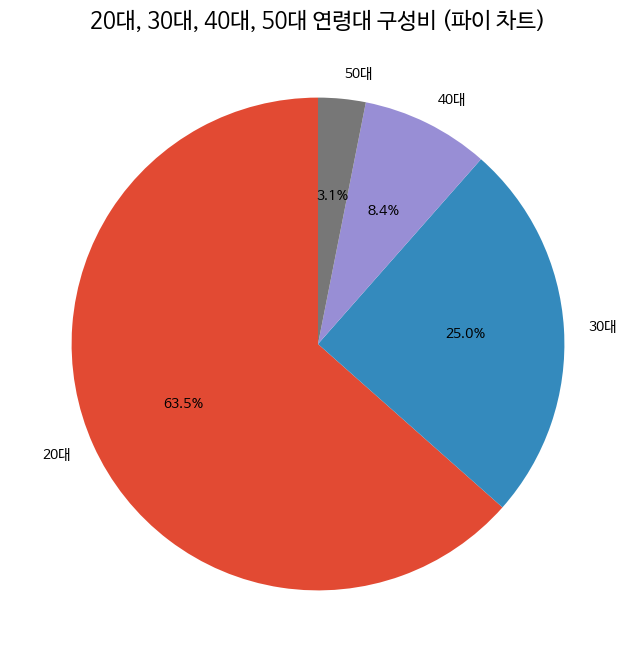

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_excel('/카셰어링_연령별구성비.xlsx')

# 데이터 가공 전 데이터 세팅
df.rename(columns={'Unnamed: 0': '분류'}, inplace=True)
df.set_index('분류', inplace=True)

# 연령대별 데이터 선택
df_degree_age = df.loc[['20대', '30대', '40대', '50대']]

# 파이 차트 그리기
fig, ax = plt.subplots(figsize=(8, 8))

# 20대, 30대, 40대, 50대의 파이 차트
df_degree_age.T.sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax)
ax.set_title('20대, 30대, 40대, 50대 연령대 구성비 (파이 차트)', size=16)

plt.show()


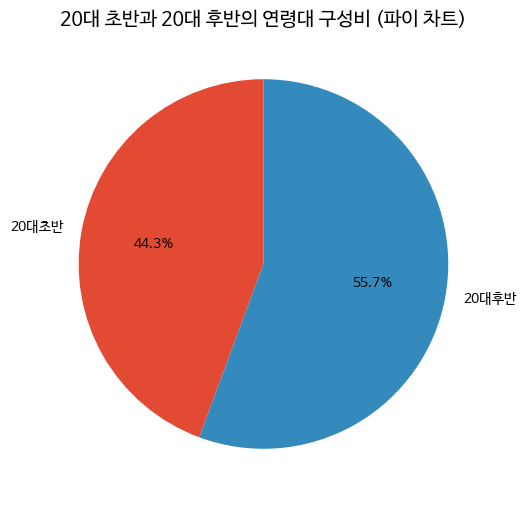

In [ ]:
# 20대 초반, 20대 후반에 대한 파이 차트로 비율 확인
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_excel('/카셰어링_연령별구성비.xlsx')

# 데이터 가공 전 데이터 세팅
df.rename(columns={'Unnamed: 0': '분류'}, inplace=True)
df.set_index('분류', inplace=True)

# 연령대별 데이터 선택
df_20_age = df.loc[['20대초반', '20대후반']]

# 파이 차트 그리기
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

# 20대 초반, 20대 후반의 파이 차트
df_20_age.T.sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes)
axes.set_title('20대 초반과 20대 후반의 연령대 구성비 (파이 차트)', size=14)

plt.show()

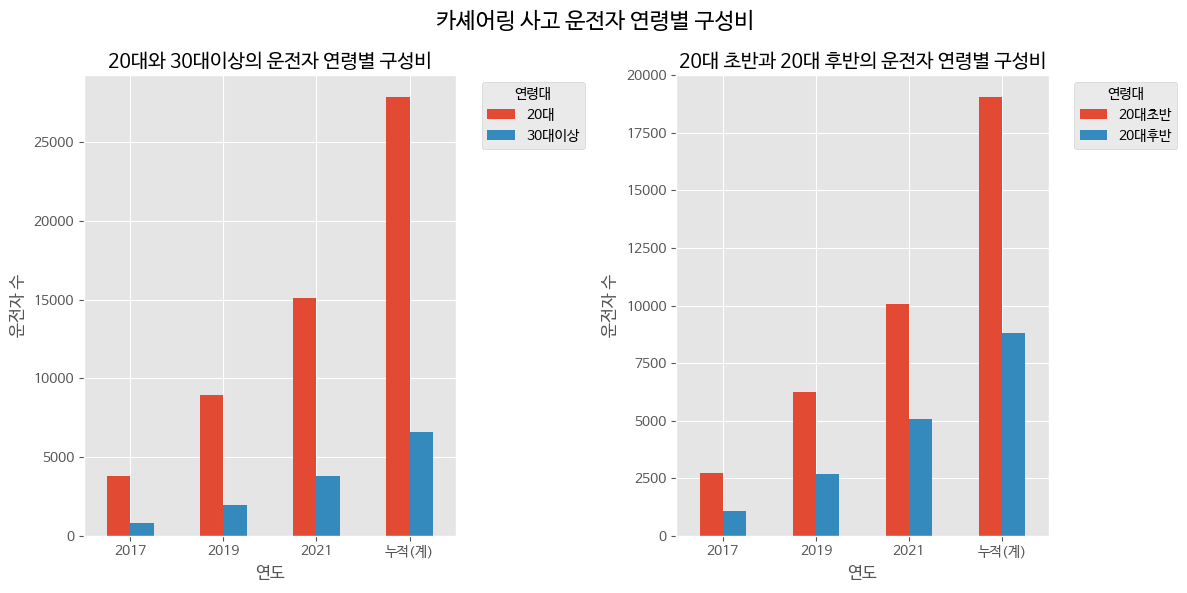

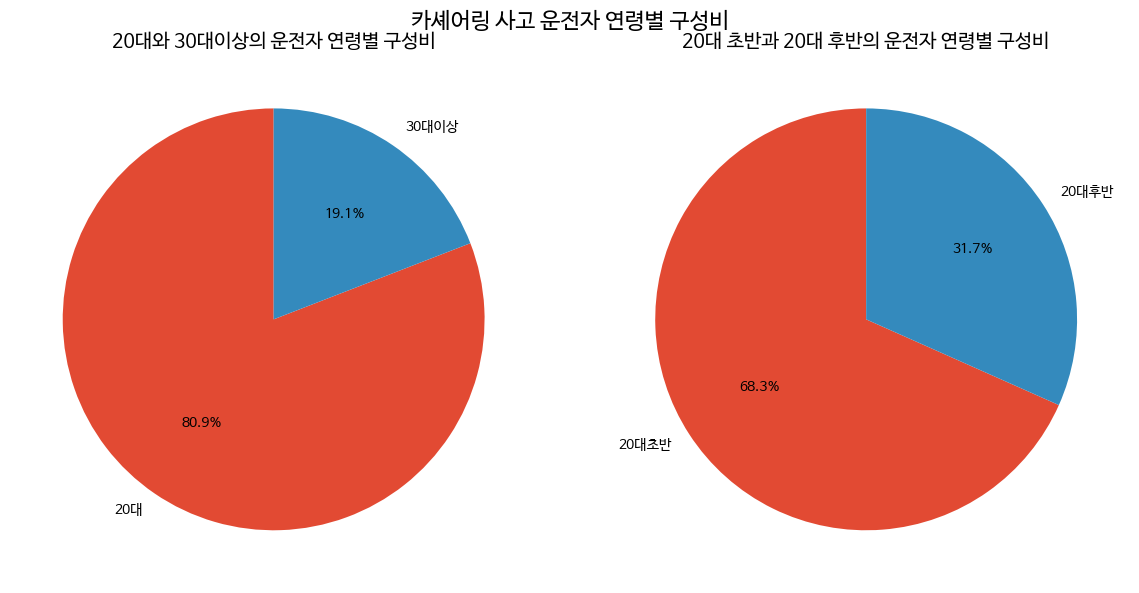

In [ ]:
# 카셰어링 사고 운전자 연령별 구성비 현황
# 위와 동일하게 막대그래프 및 파이 차트로 확인

import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_excel("/카셰어링_사고운전자_연령별구성비.xlsx")

# 데이터 가공 전 데이터 세팅
df.rename(columns={'Unnamed: 0': '분류'}, inplace=True)
df.set_index('분류', inplace=True)

# 연령대별 데이터 선택
df_degree_age = df.loc[['20대', '30대이상']]
df_20s_age = df.loc[['20대초반', '20대후반']]

# 막대 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 20대, 30대이상의 막대 그래프
df_degree_age.T.plot(kind='bar', ax=axes[0])
axes[0].set_title('20대와 30대이상의 운전자 연령별 구성비', size=14)
axes[0].set_xlabel('연도', size=12)
axes[0].set_ylabel('운전자 수', size=12)
axes[0].legend(title='연령대', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 0)

# 20대초반, 20대후반의 막대 그래프
df_20s_age.T.plot(kind='bar', ax=axes[1])
axes[1].set_title('20대 초반과 20대 후반의 운전자 연령별 구성비', size=14)
axes[1].set_xlabel('연도', size=12)
axes[1].set_ylabel('운전자 수', size=12)
axes[1].legend(title='연령대', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 0)

# 전체 그래프에 대한 타이틀 추가
plt.suptitle('카셰어링 사고 운전자 연령별 구성비', size=16)

# 서브플롯 간 간격 조정
plt.tight_layout()

# 파이 차트 그리기
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 20대, 30대이상의 파이 차트
df_degree_age.T.sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[0])
axes[0].set_title('20대와 30대이상의 운전자 연령별 구성비', size=14)

# 20대초반, 20대후반의 파이 차트
df_20s_age.T.sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[1])
axes[1].set_title('20대 초반과 20대 후반의 운전자 연령별 구성비', size=14)

# 전체 그래프에 대한 타이틀 추가
plt.suptitle('카셰어링 사고 운전자 연령별 구성비', size=16)

# 서브플롯 간 간격 조정
plt.tight_layout()

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, C

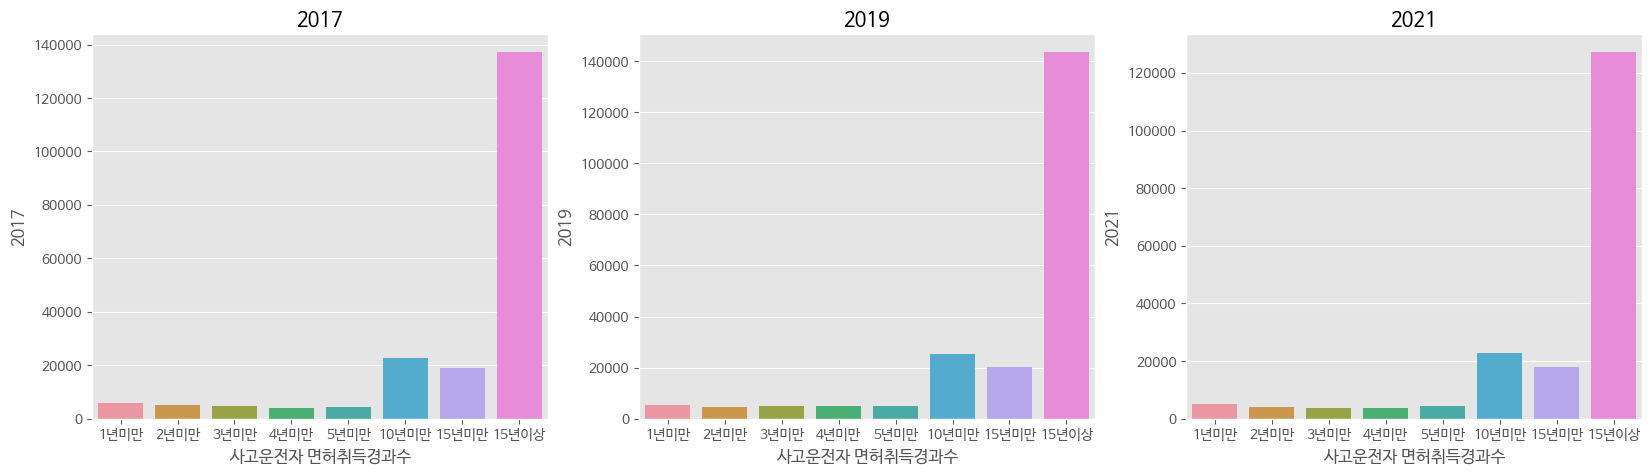

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family = 'NanumBarunGothic')

df = pd.read_excel("/면허취득경과년수_사고데이터.xls")

# 공백 제거
df.rename(columns = {'가해운전자 면허취득경과년수 ': '사고운전자 면허취득경과수'}, inplace = True)

df['사고운전자 면허취득경과수'] = df['사고운전자 면허취득경과수'].astype(str)

# 시각화에 필요한 데이터로 설정
df_2 = df.iloc[1:9, [0, 1, 3, 5]]
df_2[['2017', '2019', '2021']] = df_2[['2017', '2019', '2021']].astype(int)

# 시각화 코드
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

sns.barplot(x='사고운전자 면허취득경과수', y='2017', data=df_2, ax=axes[0], dodge = 10)
axes[0].set_title('2017')

sns.barplot(x='사고운전자 면허취득경과수', y='2019', data=df_2, ax=axes[1], dodge = 10)
axes[1].set_title('2019')

sns.barplot(x='사고운전자 면허취득경과수', y='2021', data=df_2, ax=axes[2], dodge = 10)
axes[2].set_title('2021')

plt.show()

# 전체 운전자를 기준으로 교통 사고 데이터를 분석해봤을 때 초보운전자보다 베테랑 운전자들이 교통사고를 더 많이 발생시킴
# 이유를 찾아보니 -> 본인 운전실력에 대한 부주의로 인한 사고 발생률이 높아진것임
# 따라서 점수를 산정할 때 2년 미만의 초보운전은 자명하기에 점수를 삭감하고
# 10년 이상의 운전자들 역시 부주의로 인한 사고 발생 가능성이 있기에 점수를 삭감할 필요성이 있어보임

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


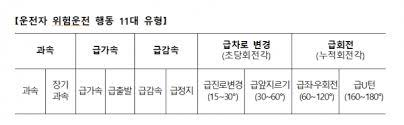

In [ ]:
# *** 점수 기준 데이터 ***

# - 사용자 입력 데이터 -> 연령대, 사고 전적, 면허 취득 기간
# - 주행 기록 데이터 -> 깜박이 횟수, 속도 변화

# 왜 점수 기준 데이터들을 저걸로 선정했는지

from google.colab import drive
from google.colab.patches import cv2
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')

images ='/content/drive/MyDrive/1주차_배경데이터/위험운전_유형.jpeg'

image = cv2.imread(images)

cv2_imshow(image)

# 이미지를 보여줌으로써 과속, 급가속, 급감속 은 속도 변화와 관련이 있고
# 급차로 변경, 급회전은 깜박이와 관련이 있다고 판단
# 따라서 주행 기록 데이터의 점수 기준은 속도 변화와 깜박이 횟수가 되는 것임

In [ ]:
# *** 주행 전 사용자 입력 부분 ***
# - 사용자 입력 데이터 -> 연령대, 사고 전적, 면허 취득 기간
# 사용자로 부터 입력 받는 데이터의 점수는 총점의 40%를 차지
# 사고 전적 -> 50%, 면허 취득 기간 -> 25%, 연령대 -> 25%

# 사고 전적에 대한 구체화 - 배점 100점
# 사고 있으면 -> 70점, 사고 없으면 -> 100점

# 연령대에 대한 구체화 - 배점 100점
# 20대 초반 -> 60점, 20대 후반 -> 70점
# 30대 -> 80점, 40대 -> 90점, 50대 이상 -> 100점

# 면허 취득 기간에 따른 점수 배점
# 1년 미만 -> 30점, 2년 미만 -> 40점, 3년 미만 -> 50점, 4년 미만 -> 60점
# 5년 미만 -> 70점, 10년 미만 -> 60점, 15년 미만 -> 50점, 15년 이상 -> 40점

import pandas as pd

class Question:
    def __init__(self):
        self.first_question = ""
        self.first_answer = ""
        self.first_question_score = 0
        self.second_question_score = 0
        self.third_question_score = 0
        self.question_count = 0
        self.second_answer = 0
        self.third_answer = 0
        self.your_score = 0.0

    def ask_first_question(self):
        print("========== 질문 1 ==========")
        while True:
            self.first_answer = input("과거 사고 전적이 있으십니까? (네/아니요)\n")
            if self.first_answer == "네":
                self.first_question_score = 70
                self.question_count += 1
                break
            elif self.first_answer == "아니요":
                self.first_question_score = 100
                self.question_count += 1
                break
            else:
                print("잘못된 입력입니다. 다시 입력 바랍니다.")

    def ask_second_question(self):
        print("========== 질문 2 ==========")
        while True:
            self.second_answer = int(input("현재 본인의 나이를 입력해주세요: "))
            if 20 <= self.second_answer < 25:
                self.second_question_score = 60
                self.question_count += 1
                break
            elif 25 <= self.second_answer < 30:
                self.second_question_score = 70
                self.question_count += 1
                break
            elif 30 <= self.second_answer < 40:
                self.second_question_score = 80
                self.question_count += 1
                break
            elif 40 <= self.second_answer < 50:
                self.second_question_score = 90
                self.question_count += 1
                break
            elif self.second_answer >= 50:
                self.second_question_score = 100
                self.question_count += 1
                break
            else:
                print("잘못된 입력입니다. 다시 입력 바랍니다.")

    def ask_third_question(self):
        print("========== 질문 3 ==========")
        while True:
            self.third_answer = int(input("면허 취득 경과 기간을 입력해주세요 (입력 단위 : 년(year), 1년이 경과하지 않았다면 0으로 입력해주세요.)\n"))
            if self.third_answer < 1:
                self.third_question_score = 30
                self.question_count += 1
                break
            elif self.third_answer < 2:
                self.third_question_score = 40
                self.question_count += 1
                break
            elif self.third_answer < 3:
                self.third_question_score = 50
                self.question_count += 1
                break
            elif self.third_answer < 4:
                self.third_question_score = 60
                self.question_count += 1
                break
            elif self.third_answer < 5:
                self.third_question_score = 70
                self.question_count += 1
                break
            elif self.third_answer < 10:
                self.third_question_score = 60
                self.question_count += 1
                break
            elif self.third_answer < 15:
                self.third_question_score = 50
                self.question_count += 1
                break
            elif self.third_answer >= 15:
                self.third_question_score = 40
                self.question_count += 1
                break
            else:
                print("잘못된 입력입니다. 다시 입력 바랍니다.")

    def get_count(self):
        return self.question_count

    def cal_score(self):
        print("점수 산출을 시작합니다.")
        self.your_score = (0.5 * float(self.first_question_score)) + (0.25 * float(self.second_question_score)) + (
                    0.25 * float(self.third_question_score))
        return self.your_score


def main():
    print("=======================================")
    print("=======                         =======")
    print("====== 카셰어링 점수 산출 시스템 ======")
    print("=======                         =======")
    print("=======================================")
    print("\n 주행 전 고객님에 대한 사전 정보를 입력받습니다.")

    q = Question()
    while True:
        start_question = input("\n 시작하시겠습니까 ? (네/아니요)\n")
        if start_question == "네":
            q.ask_first_question()
            q.ask_second_question()
            q.ask_third_question()
            break
        elif start_question == "아니요":
            print("프로그램을 종료합니다")
            break
        else:
            print("잘못된 입력입니다. 다시 입력바랍니다.")

    if q.get_count() == 3:
        score = q.cal_score()
        print("\n=========================================")
        print("\n고객님의 점수는", score, "입니다.\n")
        print("=========================================")
        print("점수를 참고하셔서 안전 운전 부탁드립니다.")
        print("주행을 시작합니다")

        # 데이터프레임 생성
        data = {
            "과거 사고 전적": [q.first_answer],
            "연령대": [q.second_answer],
            "면허 취득 기간": [q.third_answer],
            "사고 전적 점수": [q.first_question_score],
            "연령대 점수": [q.second_question_score],
            "면허 취득 기간 점수": [q.third_question_score],
            "총점": [score]
        }

        df = pd.DataFrame(data)

        # 엑셀 파일로 저장
        df.to_excel("client_score.xlsx", index=False)
        print("데이터를 엑셀 파일로 저장했습니다: client_score.xlsx")


if __name__ == "__main__":
    main()

=======                         =======
====== 카셰어링 점수 산출 시스템 ======
=======                         =======

 주행 전 고객님에 대한 사전 정보를 입력받습니다.

 시작하시겠습니까 ? (네/아니요)
네
========== 질문 1 ==========
과거 사고 전적이 있으십니까? (네/아니요)
네
========== 질문 2 ==========
현재 본인의 나이를 입력해주세요: 24
========== 질문 3 ==========
면허 취득 경과 기간을 입력해주세요 (입력 단위 : 년(year), 1년이 경과하지 않았다면 0으로 입력해주세요.)
2
점수 산출을 시작합니다.


고객님의 점수는 62.5 입니다.

점수를 참고하셔서 안전 운전 부탁드립니다.
주행을 시작합니다
데이터를 엑셀 파일로 저장했습니다: client_score.xlsx


In [ ]:
# 주행 데이터
# 전체 주행 중 주행 부분

import pandas as pd
import numpy as np

# 랜덤 시드 설정
np.random.seed(42)

# 데이터 프레임 생성을 위한 빈 리스트
data = []

# 주행 시간 설정 (예: 10분 동안 1초 간격)
drive_time = 600  # 초 단위
time_interval = 1  # 초 단위로 변경

# 초기 상태 설정
current_speed = np.random.randint(20, 80)  # 초기 속도
blink_status = 0  # 초기 깜빡이 상태 (0: 꺼짐)
blink_count = 0  # 초기 깜빡이 조작 횟수
rapid_acceleration_count = 0  # 초기 급가속 횟수
rapid_deceleration_count = 0  # 초기 급감속 횟수
prev_blink_status = 0  # 이전 깜빡이 상태

# 최대 속도 및 최소 속도 설정
max_speed = 120
min_speed = -6

# 주행 데이터 생성
for timestamp in range(0, drive_time, time_interval):
    # 현재 속도가 10 미만인 경우
    if current_speed < 10:
        # 랜덤 속도 증감율 생성 (-5에서 15 사이)
        speed_change = np.random.randint(-5, 16)
    # 현재 속도가 0인 경우
    elif current_speed == 0:
        # 랜덤 속도 증감율 생성 (0에서 15 사이)
        speed_change = np.random.randint(0, 16)
    else:
        # 그 외의 경우 랜덤 속도 증감율 생성 (-30에서 15 사이)
        speed_change = np.random.randint(-30, 16)

    # 특이 속도 증감율의 절대값이 11 이상인 경우 급가속 횟수 증가
    if speed_change > 10:
        rapid_acceleration_count += 1
    # 감속 횟수 증가
    elif speed_change < -7.5:
        rapid_deceleration_count += 1

    current_speed += speed_change

    # 최대 및 최소 속도 제한
    current_speed = max(min(current_speed, max_speed), min_speed)

    # 랜덤 깜빡이 상태 업데이트
    blink_status = np.random.choice([0, 1])

    # 깜빡이 상태가 0에서 1로 변하면서 blink_count 증가
    if blink_status == 1 and prev_blink_status == 0:
        blink_count += 1

    # 데이터를 리스트에 추가
    data.append([timestamp, current_speed, speed_change, blink_status, blink_count, rapid_acceleration_count, rapid_deceleration_count])

    # 이전 깜빡이 상태 업데이트
    prev_blink_status = blink_status

# 데이터 프레임 생성
columns = ['Time', 'Current Speed', 'Speed Change', 'Blink Status', 'Blink Count', 'Rapid Acceleration Count', 'Rapid Deceleration Count']
df = pd.DataFrame(data, columns=columns)

# 운행 시간 포맷 변경 (초를 분:초로 변환)
df['Time'] = pd.to_datetime(df['Time'], unit='s').dt.strftime('%M:%S')

# "Time" 열 이름으로 변경
df.rename_axis("Time", inplace=True)

# 전치한 데이터프레임을 엑셀 파일로 내보내기
excel_filename_transposed = "AIProjectCarDriveData.xlsx"
df.to_excel(excel_filename_transposed, index=True, header=True)

print(f"차량 주행 데이터가 성공적으로 내보내졌습니다.")

차량 주행 데이터가 성공적으로 내보내졌습니다.


In [ ]:
# 주행 후 최종 점수 산출

import pandas as pd

# 데이터프레임 A 읽어오기
df_A = pd.read_excel('AIProjectCarDriveData.xlsx', index_col='Time')

# 주행 데이터에 대한 점수 계산
initial_score = 100
acceleration_penalty = 10 * (df_A['Rapid Acceleration Count'] >= 5).iloc[-1]
deceleration_penalty = 10 * (df_A['Rapid Deceleration Count'] >= 10).iloc[-1]
blink_penalty = 15 * (df_A['Blink Count'] <= 15).iloc[-1]
speed_penalty = 50 * (df_A['Current Speed'] > 130).iloc[-1]

# 주행데이터에 대한 총 점수 계산
df_A['Driving Score'] = initial_score - acceleration_penalty - deceleration_penalty - blink_penalty - speed_penalty

# 데이터프레임 B 읽어오기
df_B = pd.read_excel('client_score.xlsx')

# 사용자 점수와 주행데이터 점수의 평균 계산
df_B['Final Score'] = (df_A['Driving Score'].iloc[-1] + df_B['총점']) / 2

# 두 데이터프레임을 결합
df_final = pd.concat([df_A, df_B], axis=1)

# 결합된 데이터프레임을 엑셀 파일로 내보내기
excel_filename_final = "Final_analysis.xlsx"
df_final.to_excel(excel_filename_final, index=True, header=True)

print(f"최종 데이터가 성공적으로 내보내졌습니다. 파일명: {excel_filename_final}")

최종 데이터가 성공적으로 내보내졌습니다. 파일명: Final_analysis.xlsx
